In [32]:
import plotly
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [26]:
data_folder = "D:\\kaggleDatasets\\demand-forecasting-kernels-only\\"

In [16]:
# First let us load the datasets into different Dataframes
train_df = pd.read_csv(data_folder +'train.csv')

# Dimensions
print('Train shape:', train_df.shape)
# Set of features we have are: date, store, and item
display(train_df.sample(10))
train_df.head()

Train shape: (913000, 4)


,date,store,item,sales
657588,2013-08-17,1,37,33
555772,2014-10-31,5,31,51
612324,2014-09-07,6,34,27
312948,2014-12-04,2,18,76
175197,2017-09-24,6,10,83
856026,2016-12-29,9,47,13
214942,2016-07-24,8,12,130
841646,2017-08-14,1,47,17
487416,2017-08-28,7,27,15
230223,2013-05-28,7,13,54


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [28]:
# Sales distribution across the train data
sales_df = train_df.copy(deep=True)
sales_df['sales_bins'] = pd.cut(sales_df.sales, [0, 50, 100, 150, 200, 250])
print('Max sale:', sales_df.sales.max())
print('Min sale:', sales_df.sales.min())
print('Avg sale:', sales_df.sales.mean())
print()

# Total number of data points
total_points = pd.value_counts(sales_df.sales_bins).sum()
print('Sales bucket v/s Total percentage:')
display(pd.value_counts(sales_df.sales_bins).apply(lambda s: (s/total_points)*100))

Max sale: 231
Min sale: 0
Avg sale: 52.250286966046005

Sales bucket v/s Total percentage:


(0, 50]       54.591407
(50, 100]     38.388322
(100, 150]     6.709974
(150, 200]     0.308544
(200, 250]     0.001752
Name: sales_bins, dtype: float64

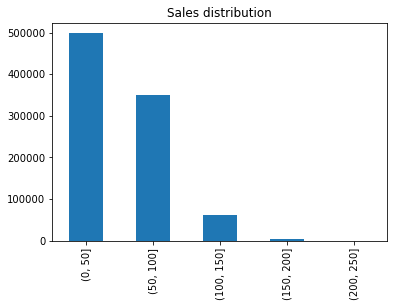

In [20]:
# Let us visualize the same
pd.value_counts(sales_df.sales_bins).plot(kind='bar', title='Sales distribution');

### As we can see, almost 92% of sales are less than 100. Max, min and average sales are 231, 0 and 52.25 respectively.
So any prediction model has to deal with the skewness in the data appropriately.

How does sales vary across stores
Let us get a overview of sales distribution in the whole data.

In [29]:
# Let us understand the sales data distribution across the stores
store_df = train_df.copy()
sales_pivoted_df = pd.pivot_table(store_df, index='store', values=['sales','date'], columns='item', aggfunc=np.mean)
# Pivoted dataframe
display(sales_pivoted_df)

sales                                                         \
item          1          2          3          4          5          6    
store                                                                     
1      19.971522  53.148959  33.208105  19.956188  16.612815  53.060789   
2      28.173604  75.316539  46.992333  28.234940  23.540526  74.945235   
3      25.070099  66.804491  41.771084  25.116101  20.857612  67.007119   
4      22.938664  61.715225  38.548193  23.086528  19.525192  61.270537   
5      16.739321  44.488499  27.835706  16.776561  14.086528  44.564622   
6      16.717963  44.533954  27.811062  16.754107  13.893209  44.503834   
7      15.159365  40.717963  25.531216  15.358160  12.733844  40.703724   
8      26.983571  71.656627  45.076123  26.948521  22.427711  71.958379   
9      23.325849  61.792442  38.535049  23.150055  19.272180  61.412377   
10     24.736035  65.566813  41.113363  24.721249  20.637459  65.612267   

                                                   ...                        \
item          7          8          9          10  ...         41         42   
store                                              ...                         
1      52.783680  69.472070  46.504929  66.354326  ...  20.002738  33.105696   
2      75.058598  99.090361  65.478094  94.097481  ...  28.069551  47.368018   
3      66.647864  87.517525  58.486857  83.387733  ...  24.989047  41.797371   
4      61.625411  80.819825  54.043812  77.047645  ...  23.168127  38.539978   
5      44.535597  58.565717  38.837349  55.509858  ...  16.830778  27.730559   
6      44.599124  58.385542  39.460022  55.565170  ...  16.607338  27.893209   
7      40.709748  53.723987  35.901972  51.156627  ...  15.471522  25.435926   
8      71.730559  94.461117  63.193319  89.818182  ...  27.036145  45.144031   
9      61.812158  81.287514  54.105696  77.105148  ...  23.191128  38.643483   
10     65.807777  86.176889  57.886637  82.232202  ...  24.654984  41.222892   

                                                                          \
item          43         44          45         46         47         48   
store                                                                      
1      46.242607  26.594195   72.720701  52.845016  19.814348  46.546002   
2      65.785323  37.785871  103.381161  75.219606  28.187842  66.028478   
3      58.197700  33.386090   91.851041  66.748083  25.120482  58.700986   
4      54.018620  30.952355   84.687295  61.420044  23.114458  53.765608   
5      39.163198  22.415115   61.427163  44.734940  16.699343  39.281490   
6      39.034502  22.322563   61.142935  44.539978  16.708653  39.052574   
7      35.426068  20.446331   55.905805  40.828587  15.479189  35.624315   
8      62.980285  36.194414   98.941402  72.004929  27.150055  62.737130   
9      54.152793  30.968237   85.093647  62.010953  23.003286  53.976999   
10     57.942497  32.916758   90.690581  66.046550  24.755750  57.814896   

                             
item          49         50  
store                        
1      26.461665  59.342826  
2      37.711939  84.622125  
3      33.259584  74.958379  
4      30.840635  68.921687  
5      22.371851  50.319277  
6      22.181271  50.516429  
7      20.406353  45.823658  
8      36.035049  80.972070  
9      31.052574  69.308324  
10     33.032311  74.037240  

[10 rows x 50 columns]

### This pivoted dataframe has average sales per each store per each item.
Let use this dataframe and produce some interesting visualizations

In [30]:
# Let us calculate the average sales of all the items by each store
sales_across_store_df = sales_pivoted_df.copy()
sales_across_store_df['avg_sale'] = sales_across_store_df.apply(lambda r: r.mean(), axis=1)

In [33]:
# Scatter plot of average sales per store
sales_store_data = go.Scatter(
    y = sales_across_store_df.avg_sale.values,
    mode='markers',
    marker=dict(
        size = sales_across_store_df.avg_sale.values,
        color = sales_across_store_df.avg_sale.values,
        colorscale='Viridis',
        showscale=True
    ),
    text = sales_across_store_df.index.values
)
data = [sales_store_data]

sales_store_layout = go.Layout(
    autosize= True,
    title= 'Scatter plot of avg sales per store',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Stores',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title= 'Avg Sales',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=sales_store_layout)
py.iplot(fig,filename='scatter_sales_store')


### From the visualization, it is clear that the stores with ID 2 and 8 have higher average sales than the remaining stores and is a clear indication that they are doing good money!

Whereas store with ID 7 has very poor performance in terms of average sales.

In [9]:
# Let us calculate the average sales of each of the item across all the stores
sales_across_item_df = sales_pivoted_df.copy()
# Aggregate the sales per item and add it as a new row in the same dataframe
sales_across_item_df.loc[11] = sales_across_item_df.apply(lambda r: r.mean(), axis=0)
# Note the 11th index row, which is the average sale of each of the item across all the stores
#display(sales_across_item_df.loc[11:])
avg_sales_per_item_across_stores_df = pd.DataFrame(data=[[i+1,a] for i,a in enumerate(sales_across_item_df.loc[11:].values[0])], columns=['item', 'avg_sale'])
# And finally, sort by avg sale
avg_sales_per_item_across_stores_df.sort_values(by='avg_sale', ascending=False, inplace=True)
# Display the top 10 rows
display(avg_sales_per_item_across_stores_df.head())

,item,avg_sale
14,15,88.030778
27,28,87.881325
12,13,84.316594
17,18,84.275794
24,25,80.686418


In [10]:
avg_sales_per_item_across_stores_sorted = avg_sales_per_item_across_stores_df.avg_sale.values
# Scatter plot of average sales per item
sales_item_data = go.Bar(
    x=[i for i in range(0, 50)],
    y=avg_sales_per_item_across_stores_sorted,
    marker=dict(
        color=avg_sales_per_item_across_stores_sorted,
        colorscale='Blackbody',
        showscale=True
    ),
    text = avg_sales_per_item_across_stores_df.item.values
)
data = [sales_item_data]

sales_item_layout = go.Layout(
    autosize= True,
    title= 'Scatter plot of avg sales per item',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Items',
        ticklen= 55,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title= 'Avg Sales',
        ticklen= 10,
        zeroline= False,
        gridwidth= 1,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=sales_item_layout)
py.iplot(fig,filename='scatter_sales_item')

In [11]:
store_item_df = train_df.copy()
# First, let us filterout the required data
store_id = 10   # Some store
item_id = 40    # Some item
print('Before filter:', store_item_df.shape)
store_item_df = store_item_df[store_item_df.store == store_id]
store_item_df = store_item_df[store_item_df.item == item_id]
print('After filter:', store_item_df.shape)
#display(store_item_df.head())

# Let us plot this now
store_item_ts_data = [go.Scatter(
    x=store_item_df.date,
    y=store_item_df.sales)]
py.iplot(store_item_ts_data)


Before filter: (913000, 4)
After filter: (1826, 4)


### Woww! Clearly there is a pattern here! Feel free to play around with different store and item IDs.
Almost all the items and store combination has this pattern!

The sales go high in June, July and August months. The sales will be lowest in December, January and February months. That's something!!

Let us make it more interesting. What if we aggregate the sales on a montly basis and compare different items and stores.
This should help us understand how different item sales behave at a high level.

In [12]:
multi_store_item_df = train_df.copy()
# First, let us filterout the required data
store_ids = [1, 1, 1, 1]   # Some stores
item_ids = [10, 20, 30, 40]    # Some items
print('Before filter:', multi_store_item_df.shape)
multi_store_item_df = multi_store_item_df[multi_store_item_df.store.isin(store_ids)]
multi_store_item_df = multi_store_item_df[multi_store_item_df.item.isin(item_ids)]
print('After filter:', multi_store_item_df.shape)
#display(multi_store_item_df)
# TODO Monthly avg sales

# Let us plot this now
multi_store_item_ts_data = []
for st,it in zip(store_ids, item_ids):
    flt = multi_store_item_df[multi_store_item_df.store == st]
    flt = flt[flt.item == it]
    multi_store_item_ts_data.append(go.Scatter(x=flt.date, y=flt.sales, name = "Store:" + str(st) + ",Item:" + str(it)))
py.iplot(multi_store_item_ts_data)

Before filter: (913000, 4)
After filter: (7304, 4)


#### Interesting!!
Though the pattern remains same across different stores and items combinations, the actual sale value consitently varies with the same scale.

As we can see in the visualization, item 10 has consistently highest sales through out the span of 5 years!
This is an interesting behaviour that can be seen across almost all the items.